# Domain Adaptation experiments

- In this notebook we will show how to launch the experiments and display tables and figures availables in the paper.
- Notice that the name of some methods are different from the paper, notably Optimal Tensor Transport was originaly named Generalized Optimal Tensor (GOT).
- It is possible that the code do to run directly as some datasets and intermediate files as been deleted due to size limit. The dataset for the HDA task in available at (https://grouplens.org/datasets/movielens/)
- The key function is OTT in gromov.py
- I changed some part of the code, I hope I did not add any bugs. Do not hesitate to send a mail to: tanguy.kerdoncuff@laposte.net if you have any problem at all.

Use the "-s" option to save the result and add the "-n" option to recreate the 6 datasets.

In [7]:
!python HDA.py -n --numberIteration 2 --nb_iter 2 --dataset C_T_F 

{'path_S': 'Movies/subdataset/', 'path_T': 'Movies/subdataset/', 'dataset': 'C_T_F', 'param1': '', 'param2': '', 'param3': '', 'time_cross_val': 24, 'numberIteration': 2, 'adaptationAlgoUsed': 'smart_random,ScalableGW,gromov,COT,target_classifier,GOT_t_init', 'semi_supervised': '0/1,1', 'p': 'uniform', 'q': 'uniform', 'loss_fun': 'L2', 'M': 'None', 'T': 'uniform', 'alpha': '1', 'nb_iter': 2, 'nb_samples': '1000', 'nb_samples_t': '1000', 'epsilon': 0.5, 'KL': 1, 'eta': 0.001, 'L2': 0, 'rdm': 1234567, 'pickle_path': './DA/DA_pickle/', 'pickle_name': 'DA', 'verbose': False, 'best_param': False, 'different': False, 'cheat': False, 'save_pickle': False, 'new_dataset': False, 'specific_comparaison': 'None', 'parameters_analysed': 'None', 'parameters_analysed_values': None, 'test': False}
C_T_F
     54.2  0.2   10000000.000000  smart_random   0.00s
     63.0  0.0   0.006271  ScalableGW  13.33s
     70.5  0.0   0.270411  gromov   0.32s
     70.5  0.0   0.619291  COT      0.13s
     62.5  0.0  

# Tables

First we find the best hyperparameters with

In [8]:
!python HDA.py --adaptationAlgoUsed gromov --specific_comparaison best_param --time_cross_val 0.0001

{'path_S': 'Movies/subdataset/', 'path_T': 'Movies/subdataset/', 'dataset': 'C_T_F,C_T_C,C_T_W,C_F_C,C_F_W,C_C_W', 'param1': '', 'param2': '', 'param3': '', 'time_cross_val': 0.0001, 'numberIteration': 10, 'adaptationAlgoUsed': 'gromov', 'semi_supervised': '0/1,1', 'p': 'uniform', 'q': 'uniform', 'loss_fun': 'L2', 'M': 'None', 'T': 'uniform', 'alpha': '1', 'nb_iter': 1000, 'nb_samples': '1000', 'nb_samples_t': '1000', 'epsilon': 0.5, 'KL': 1, 'eta': 0.001, 'L2': 0, 'rdm': 1234567, 'pickle_path': './DA/DA_pickle/', 'pickle_name': 'DA', 'verbose': False, 'best_param': False, 'different': False, 'cheat': False, 'save_pickle': False, 'new_dataset': False, 'specific_comparaison': 'best_param', 'parameters_analysed': 'None', 'parameters_analysed_values': None, 'test': False}

Train :  ['gromov']
Running : 0 epsilon 0.001 eta 1
C_T_F
The method as not converged. Return last stable T. Nb iter : 0
The method as not converged. Return last stable T. Nb iter : 0
The method as not converged. Return

We launch the code with those parameters, the code in launch again to avoid any biais for the stochastic methods.

In [ ]:
!python HDA.py -b -d

In [2]:
import HDA
HDA.latex_table(path_pickle="DA/DA_pickle/DA___.pickle",
                list_exp=['C_T_F', 'C_T_C', 'C_T_W', 'C_F_C', 'C_F_W', 'C_C_W'],
                names_algo="smart_random,target_classifier,ScalableGW,gromov,COT,OTT".split(","),
                list_algo_plot=['\\smartrandom{}', '\\targetclassifier{}', '\\ScalableGW{}', '\\gromov{}',
                                '\\COT{}','OTT'],
                list_exp_plot=['T,F', 'T,C', 'T,W', 'F,C', 'F,W', 'C,W'])

\begin{table}
\centering
\caption{Accuracy with the best hyperparameters sets on 6 DA tasks.()}
\label{tab:DA}
\begin{tabular}{lllllll}
\toprule
Datasets & \smartrandom{} & \targetclassifier{} & \ScalableGW{} & \gromov{} & \COT{} &                    OTT \\
\midrule
     T,F &   50.4$\pm$3.5 &                62.5 &          63.0 &      62.0 &   72.0 &  \textbf{80.8}$\pm$0.7 \\
     T,C &   50.6$\pm$3.0 &                69.0 &          77.0 &      78.0 &   83.0 &  \textbf{97.0}$\pm$0.2 \\
     T,W &   51.2$\pm$4.0 &                32.5 &          61.0 &      63.0 &   65.5 &  \textbf{71.3}$\pm$5.0 \\
     F,C &   49.4$\pm$2.3 &       \textbf{74.5} &          72.0 &      74.0 &   74.0 &           70.2$\pm$4.0 \\
     F,W &   49.6$\pm$3.4 &                53.0 &          53.0 &      60.5 &   47.0 &  \textbf{67.9}$\pm$2.3 \\
     C,W &   49.2$\pm$3.3 &                60.0 &          57.0 &      52.0 &   67.5 &  \textbf{76.8}$\pm$6.4 \\
     AVG &   50.0$\pm$3.3 &                58.6 &      

In [ ]:
!python HDA.py -b -d -c

In [3]:
import HDA
HDA.latex_table(path_pickle="DA/DA_pickle/DAcheat___.pickle",
                list_exp=['C_T_F', 'C_T_C', 'C_T_W', 'C_F_C', 'C_F_W', 'C_C_W'],
                names_algo="smart_random,target_classifier,ScalableGW,gromov,COT,OTT".split(","),
                list_algo_plot=['\\smartrandom{}', '\\targetclassifier{}', '\\ScalableGW{}', '\\gromov{}',
                                '\\COT{}', 'OTT'],
                list_exp_plot=['T,F', 'T,C', 'T,W', 'F,C', 'F,W', 'C,W'])

\begin{table}
\centering
\caption{Accuracy with the best hyperparameters sets on 6 DA tasks.(cheat)}
\label{tab:DAcheat}
\begin{tabular}{lllllll}
\toprule
Datasets & \smartrandom{} & \targetclassifier{} & \ScalableGW{} & \gromov{} & \COT{} &                    OTT \\
\midrule
     T,F &   50.4$\pm$3.5 &                62.5 &          66.0 &      72.0 &   72.0 &  \textbf{80.8}$\pm$0.7 \\
     T,C &   50.6$\pm$3.0 &                69.0 &          77.0 &      83.5 &   83.0 &  \textbf{97.0}$\pm$0.2 \\
     T,W &   51.2$\pm$4.0 &                32.5 &          66.0 &      69.0 &   69.0 &  \textbf{71.3}$\pm$5.0 \\
     F,C &   49.4$\pm$2.3 &                74.5 &          74.0 &      78.0 &   75.5 &  \textbf{78.8}$\pm$2.9 \\
     F,W &   49.6$\pm$3.4 &                53.0 &          57.0 &      60.5 &   57.0 &  \textbf{68.6}$\pm$2.2 \\
     C,W &   49.2$\pm$3.3 &                60.0 &          58.0 &      63.0 &   67.5 &  \textbf{76.8}$\pm$6.4 \\
     AVG &   50.0$\pm$3.3 &                58

# Hyperparameter around best value

To launch the code for the class regularization hyperparameter $\eta=2$ and $\eta=3$ use the following code.

In [ ]:
!python HDA.py -b -d --parameters_analysed eta --parameters_analysed_values 2,3 --specific_comparaison param_experiment 

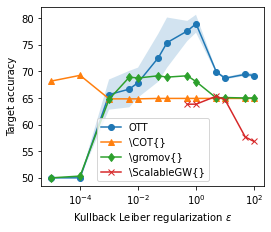

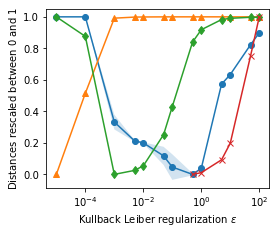

In [1]:
import HDA

HDA.latex_hyper_without_final(path_pickle="DA/DA_pickle/epsilon/", log=True,
                              names_algo=["OTT", "COT", "gromov", "ScalableGW",],
                              list_algo_plot=["OTT", "\\COT{}", "\\gromov{}", "\\ScalableGW{}"],
                              list_param=[0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1,
                                          0.5, 1.0, 5.0, 10.0, 50.0, 100.0],
                             loc=[8,9], labelx=["Kullback Leiber regularization $\\epsilon{}$",
                                                "Kullback Leiber regularization $\\epsilon{}$"],
                labely=["Target accuracy", "Distances rescaled between $0$ and $1$"],
                             figsize=[(4,3.3),(4,3.3)],
                              name_scale="epsilon",
                             list_symbol_plot=["o", "^", "d", "x"], legend=[True, False])

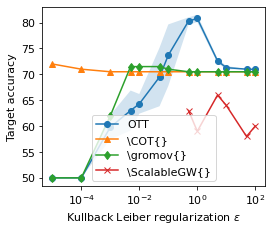

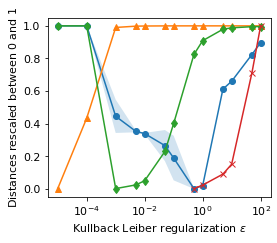

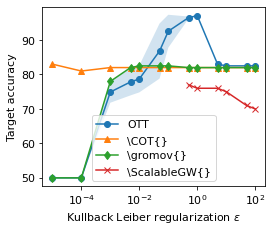

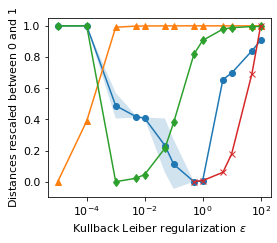

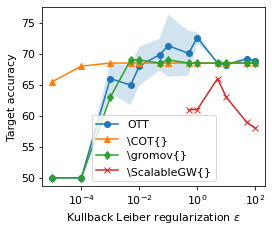

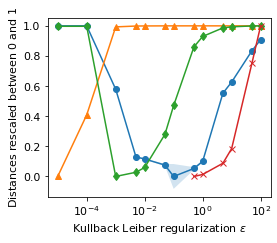

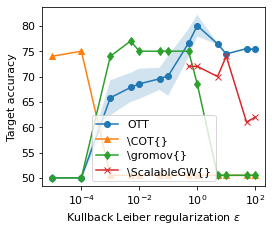

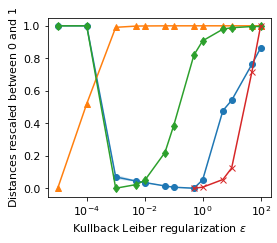

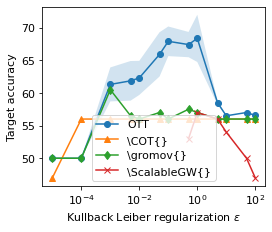

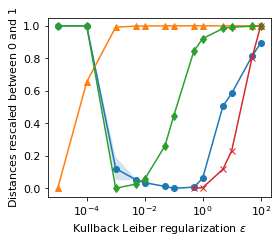

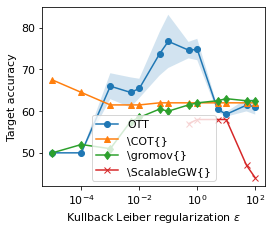

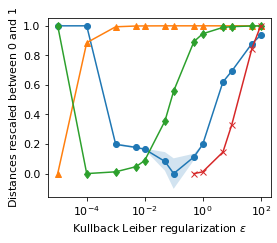

In [2]:
import HDA

HDA.latex_hyper_without_final_separated(path_pickle="DA/DA_pickle/epsilon/", log=True,
                              names_algo=["OTT", "COT", "gromov", "ScalableGW",],
                              list_algo_plot=["OTT", "\\COT{}", "\\gromov{}", "\\ScalableGW{}"],
                              list_param=[0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1,
                                          0.5, 1.0, 5.0, 10.0, 50.0, 100.0],
                             loc=[8,9], labelx=["Kullback Leiber regularization $\\epsilon{}$",
                                                "Kullback Leiber regularization $\\epsilon{}$"],
                labely=["Target accuracy", "Distances rescaled between $0$ and $1$"],
                             figsize=[(4,3.3),(4,3.3)],
                             list_symbol_plot=["o", "^", "d", "x"], legend=[True, False])

### Eta

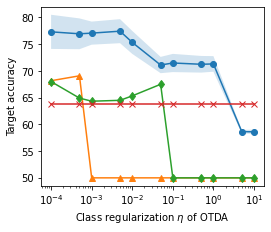

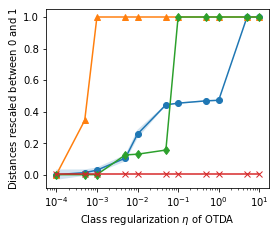

In [3]:
import HDA

HDA.latex_hyper_without_final(path_pickle="DA/DA_pickle/eta/", log=True,
                              names_algo=["OTT", "COT", "gromov", "ScalableGW"],
                              list_algo_plot=["OTT", "\\COT{}", "\\gromov{}", "\\ScalableGW{}"],
                              list_param=[0.0001, 0.0005, 0.001, 0.005,
                                          0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
                              labelx=["Class regularization $\\eta$ of OTDA",
                                      "Class regularization $\\eta$ of OTDA"],
                              labely=["Target accuracy", "Distances rescaled between $0$ and $1$"], loc=[3,2],
                             figsize=[(4,3.3),(4,3.3)],
                             list_symbol_plot=["o", "^", "d", "x"], legend=[False,False])

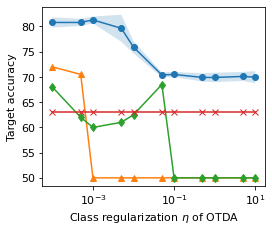

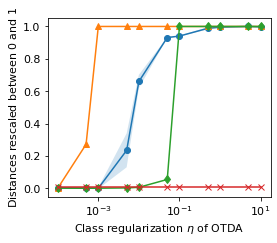

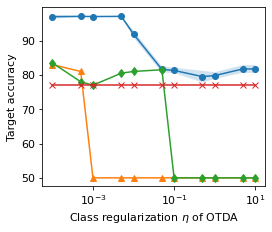

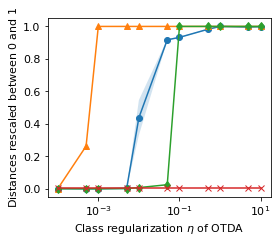

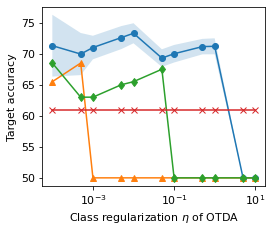

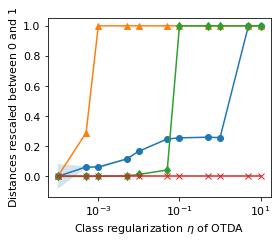

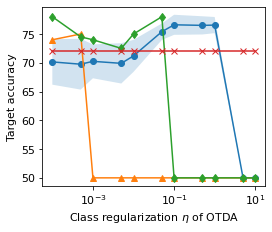

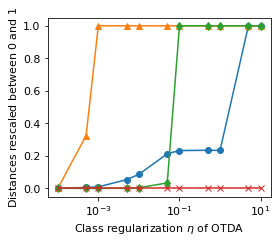

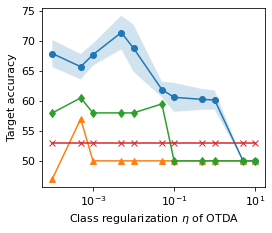

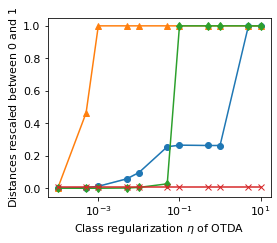

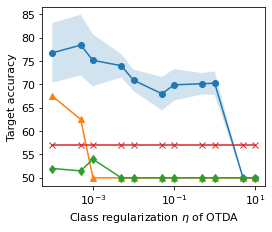

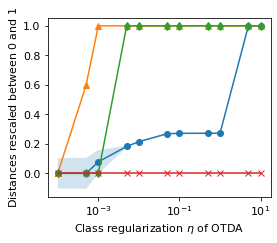

In [4]:
import HDA
HDA.latex_hyper_without_final_separated(path_pickle="DA/DA_pickle/eta/", log=True,
                              names_algo=["OTT", "COT", "gromov", "ScalableGW"],
                              list_algo_plot=["OTT", "\\COT{}", "\\gromov{}", "\\ScalableGW{}"],
                              list_param=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
                              labelx=["Class regularization $\\eta{}$ of OTDA",
                                      "Class regularization $\\eta{}$ of OTDA"],
                              labely=["Target accuracy", "Distances rescaled between $0$ and $1$"], loc=[3,2],
                             figsize=[(4,3.3),(4,3.3)],
                             list_symbol_plot=["o", "^", "d", "x"], legend=[False, False])

### Supervision user

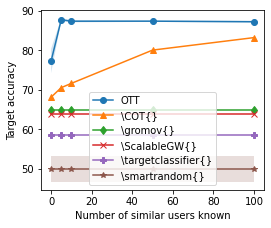

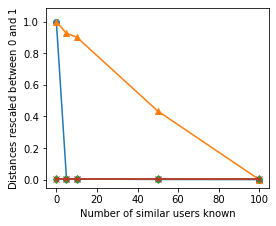

In [5]:
import HDA
HDA.latex_hyper_without_final(path_pickle="DA/DA_pickle/supervision_user/",
                names_algo=["OTT", "COT", "gromov", "ScalableGW",
                            "target_classifier", "smart_random"],
                list_algo_plot=["OTT", "\\COT{}", "\\gromov{}", "\\ScalableGW{}",
                                "\\targetclassifier{}", "\\smartrandom{}"],
#                 list_param_plot=[0,5,10,50,100],
                list_param=[0,5,10,50,100],
                labelx=["Number of similar users known",
                        "Number of similar users known"],
                labely=["Target accuracy", "Distances rescaled between $0$ and $1$"],
                loc=[8,9], log=False,figsize=[(4,3.3),(4,3.3)],
               list_symbol_plot=["o", "^", "d", "x", "P", "*"], legend=[True, False])

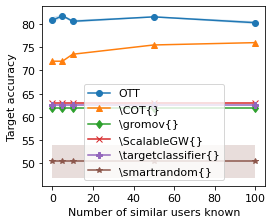

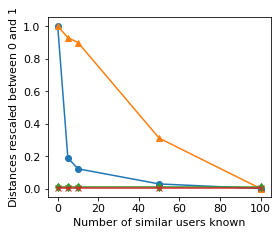

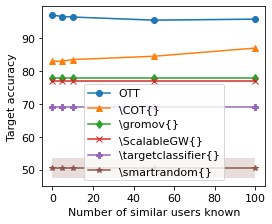

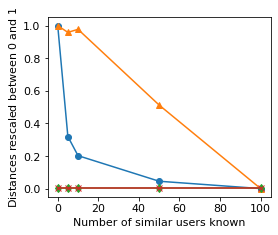

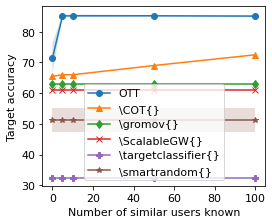

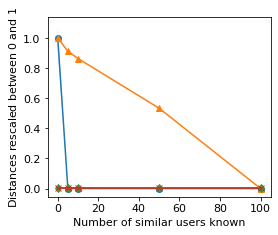

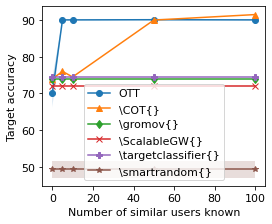

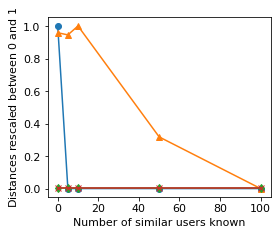

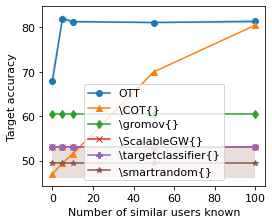

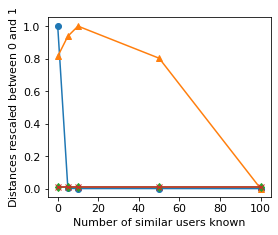

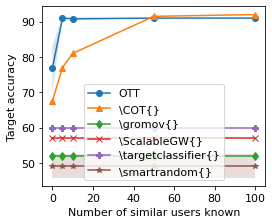

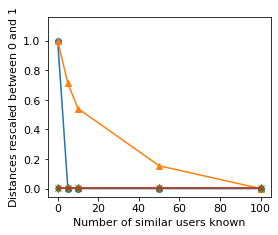

In [6]:
import HDA
HDA.latex_hyper_without_final_separated(path_pickle="DA/DA_pickle/supervision_user/",
                names_algo=["OTT", "COT", "gromov", "ScalableGW",
                            "target_classifier", "smart_random"],
                list_algo_plot=["OTT", "\\COT{}", "\\gromov{}", "\\ScalableGW{}",
                                "\\targetclassifier{}", "\\smartrandom{}"],
#                 list_param_plot=[0,5,10,50,100],
                list_param=[0,5,10,50,100],
                labelx=["Number of similar users known",
                        "Number of similar users known"],
                labely=["Target accuracy", "Distances rescaled between $0$ and $1$"],
                loc=[8,9], log=False,figsize=[(4,3.3),(4,3.3)],
               list_symbol_plot=["o", "^", "d", "x", "P", "*"], legend=[True, False])

### Supevision movie

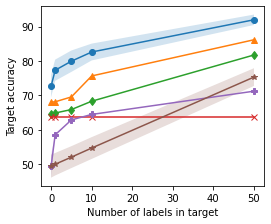

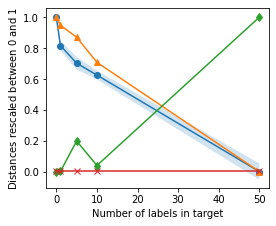

In [7]:
import HDA
HDA.latex_hyper_without_final(path_pickle="DA/DA_pickle/supervision_movie/",
                names_algo=["OTT", "COT", "gromov", "ScalableGW",
                            "target_classifier", "smart_random"],
                list_algo_plot=["OTT", "\\COT{}", "\\gromov{}", "\\ScalableGW{}",
                                "\\targetclassifier{}", "\\smartrandom{}"],
#                 list_param_plot=[0,5,10,50,100],
                list_param=[0,1,5,10,50],
                labelx=["Number of labels in target",
                        "Number of labels in target"],
                labely=["Target accuracy", "Distances rescaled between $0$ and $1$"],
                loc=[4,9], log=False,figsize=[(4,3.3),(4,3.3)],
               list_symbol_plot=["o", "^", "d", "x", "P", "*"], legend=[False,False])

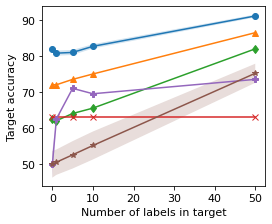

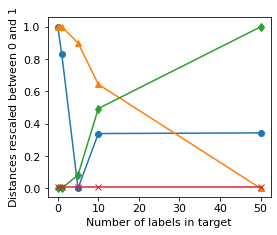

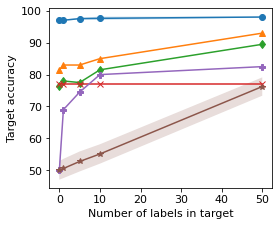

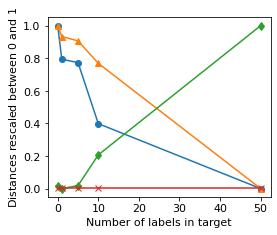

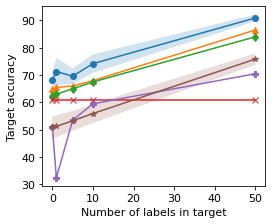

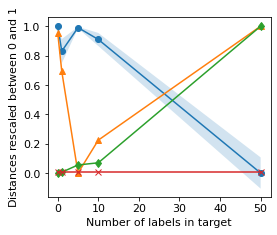

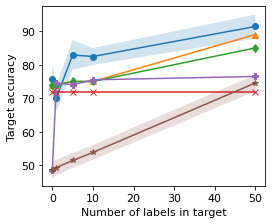

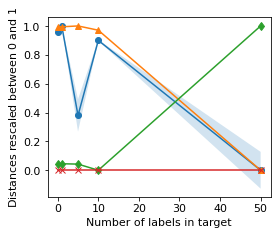

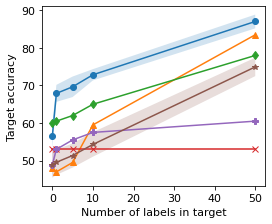

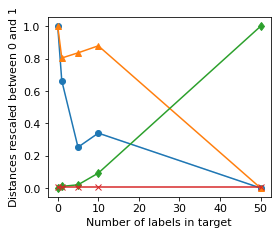

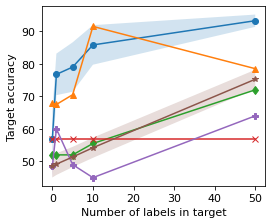

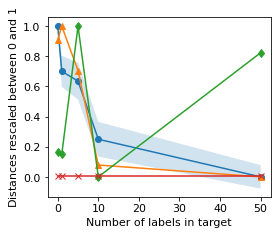

In [8]:
import HDA
HDA.latex_hyper_without_final_separated(path_pickle="DA/DA_pickle/supervision_movie/",
                names_algo=["OTT", "COT", "gromov", "ScalableGW",
                            "target_classifier", "smart_random"],
                list_algo_plot=["OTT", "\\COT{}", "\\gromov{}", "\\ScalableGW{}",
                                "\\targetclassifier{}", "\\smartrandom{}"],
#                 list_param_plot=[0,5,10,50,100],
                list_param=[0,1,5,10,50],
                labelx=["Number of labels in target",
                        "Number of labels in target"],
                labely=["Target accuracy", "Distances rescaled between $0$ and $1$"],
                loc=[8,9], log=False,figsize=[(4,3.3),(4,3.3)],
               list_symbol_plot=["o", "^", "d", "x", "P", "*"], legend=[False, False])

### Number of samples

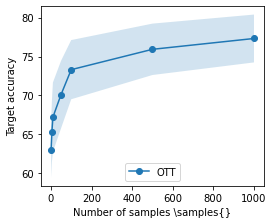

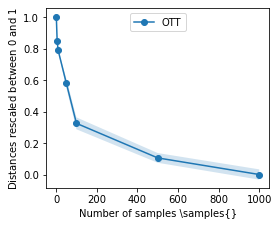

In [9]:
import HDA
HDA.latex_hyper_without_final(path_pickle="DA/DA_pickle/nb_samples/",
                names_algo=["OTT"],
                list_algo_plot=["OTT"],
#                 list_param_plot=[0,5,10,50,100],
                list_param=[1,5,10,50,100,500,1000],
                labelx=["Number of samples \\samples{}",
                        "Number of samples \\samples{}"],
                labely=["Target accuracy", "Distances rescaled between $0$ and $1$"],
                loc=[8,9], log=False,figsize=[(4,3.3),(4,3.3)],
               list_symbol_plot=["o", "^", "d", "x", "P", "*"])

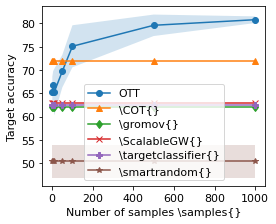

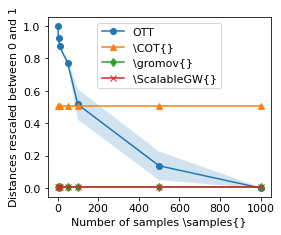

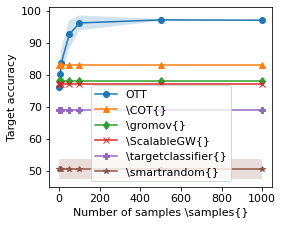

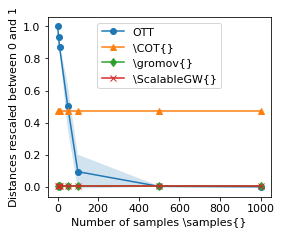

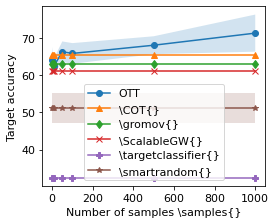

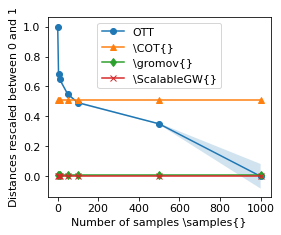

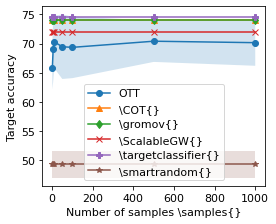

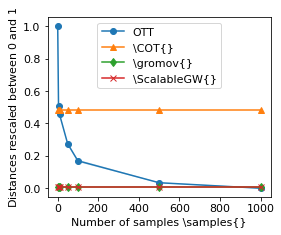

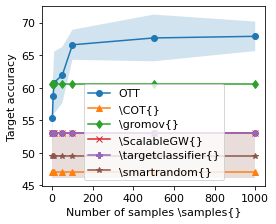

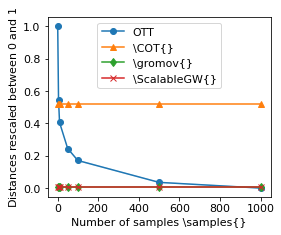

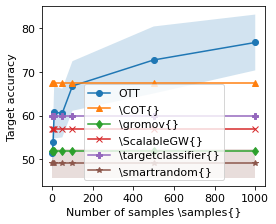

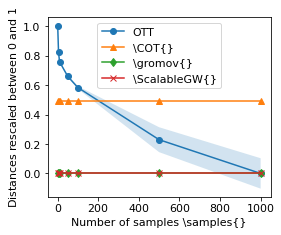

In [10]:
import HDA
HDA.latex_hyper_without_final_separated(path_pickle="DA/DA_pickle/nb_samples/",
                names_algo=["OTT", "COT", "gromov", "ScalableGW",
                            "target_classifier", "smart_random"],
                list_algo_plot=["OTT", "\\COT{}", "\\gromov{}", "\\ScalableGW{}",
                                "\\targetclassifier{}", "\\smartrandom{}"],
#                 list_param_plot=[0,5,10,50,100],
                list_param=[1,5,10,50,100,500,1000],
                labelx=["Number of samples \\samples{}",
                        "Number of samples \\samples{}"],
                labely=["Target accuracy", "Distances rescaled between $0$ and $1$"],
                loc=[8,9], log=False,figsize=[(4,3.3),(4,3.3)],
               list_symbol_plot=["o", "^", "d", "x", "P", "*"])

# Visualization

In [ ]:
!python Visualization.py

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import Visualization
@interact
def plot_widgets(image1=widgets.IntSlider(312, min=0, max=400),#312
                 image2=widgets.IntSlider(316, min=0, max=400),#316
                 save=False,
                 labels_selected_str=[",0,1"]):
    Visualization.plot_images(image1=image1, image2=image2,save=save,
                              labels_selected_str=labels_selected_str,
                              path1='./visualization/pickle_save/',
                              path2='./visualization/pickle_save/')

# Gradient estimation

In [ ]:
!python Gradient_experiment.py -d -s --D 2,5 --cluster "25,35,40"

In [ ]:
!python Gradient_experiment.py -s --D 2 --cluster "25,35,40"

In [ ]:
!python Gradient_experiment.py -s --D 3 --cluster "25,35,40"

In [ ]:
!python Gradient_experiment.py -s --D 4 --cluster "25,35,40"

In [2]:
!python Gradient_experiment.py -p -s --D 2,5  --cluster "25,35,40"

nb element in the tensor L of size N^d2 :  10000
nb element in the tensor L of size N^d3 :  100000000
nb element in the tensor L of size N^d4 :  1000000000000
Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)
